An initial analysis of the features that affect the target (metastatic_diagnosis_period), analysis of null values and null handling.

- Correlation method - Kendall
- Current list of features being used:

    * "patient_id"
    * "metastatic_diagnosis_period"
    * "breast_cancer_diagnosis_desc"
    * "breast_cancer_diagnosis_code"

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

In [170]:
df = pd.read_csv("train.csv")
df.head(5)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,...,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,...,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33
2,277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,F,NaN,...,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157
3,320055,Hispanic,MEDICAID,CA,900,West,Pacific,59,F,NaN,...,63.34,63.10,67.45,75.86,75.24,71.10,68.95,65.46,59.46,146
4,190386,NaN,COMMERCIAL,CA,934,West,Pacific,71,F,NaN,...,59.45,60.24,64.77,69.81,70.13,68.10,65.38,60.72,54.08,286


In [171]:
print(f"Total number of features: {len(df.axes[1])}")

Total number of features: 152


Create a dataframe that displays the column names, the % of null values and the datatype of the column

In [172]:
percentage_null_vals = df.isnull().mean()*100
feature_dtypes = df.dtypes

summary_df = pd.DataFrame({
    'Feature': df.columns,
    '% Null Values': percentage_null_vals,
    'Data Type': feature_dtypes
}).reset_index(drop=True)

summary_df.head(5)

,Feature,% Null Values,Data Type
0,patient_id,0.000000,int64
1,patient_race,50.535186,object
2,payer_type,13.398618,object
3,patient_state,0.000000,object
4,patient_zip3,0.000000,int64


## Determining Correlation Between Features and Target Variable

In [173]:
print(f"List of datatypes: {summary_df['Data Type'].unique()}")

List of datatypes: [dtype('int64') dtype('O') dtype('float64')]


Here, df is split into 2 dataframes called numeric and categorical. This is to conduct correlation between the target and each feature to determine the top features that should be considered.

In [174]:
numeric = df.select_dtypes(include='number')
categorical = df.select_dtypes(exclude='number')

print(f"Number of numeric features: {len(numeric.axes[1])}")
print(f"Number of categorical features: {len(categorical.axes[1])}")

#Adding the target numeric column "metastatic_diagnosis_period" to categorical
categorical["metastatic_diagnosis_period"] = numeric["metastatic_diagnosis_period"]

Number of numeric features: 141
Number of categorical features: 11


### Computing correlation for categorical variables

In [175]:
categorical.head(2)

,patient_race,payer_type,patient_state,Region,Division,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,metastatic_diagnosis_period
0,NaN,COMMERCIAL,AR,South,West South Central,F,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,191
1,White,NaN,IL,Midwest,East North Central,F,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,NaN,NaN,33


In [176]:
categorical.drop(["metastatic_first_novel_treatment","metastatic_first_novel_treatment_type"], axis=1, inplace=True)
categorical.dropna()

,patient_race,payer_type,patient_state,Region,Division,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_diagnosis_period
3,Hispanic,MEDICAID,CA,West,Pacific,F,C50911,Malignant neoplasm of unsp site of right femal...,C773,146
6,White,MEDICARE ADVANTAGE,OH,Midwest,East North Central,F,C50412,Malig neoplasm of upper-outer quadrant of left...,C799,59
7,White,COMMERCIAL,DE,South,South Atlantic,F,C50411,Malig neoplm of upper-outer quadrant of right ...,C792,316
9,White,COMMERCIAL,CA,West,Pacific,F,C50912,Malignant neoplasm of unspecified site of left...,C773,184
10,Black,MEDICARE ADVANTAGE,PA,Northeast,Middle Atlantic,F,C50911,Malignant neoplasm of unsp site of right femal...,C7989,316
...,...,...,...,...,...,...,...,...,...,...
13162,Black,MEDICAID,SC,South,South Atlantic,F,C50919,Malignant neoplasm of unsp site of unspecified...,C773,182
13164,Other,COMMERCIAL,CO,West,Mountain,F,C50919,Malignant neoplasm of unsp site of unspecified...,C7931,64
13165,Black,COMMERCIAL,GA,South,South Atlantic,F,C50919,Malignant neoplasm of unsp site of unspecified...,C779,70
13168,Hispanic,MEDICAID,PA,Northeast,Middle Atlantic,F,C50911,Malignant neoplasm of unsp site of right femal...,C773,106


In [177]:
last_column = categorical.columns[-1]

df_encoded = pd.get_dummies(categorical)

correlations = df_encoded.corr(method='kendall')

Here, correlation for each dummy label under each of the main categories in categorical are explored

In [178]:
def find_extreme_correlations(series, category):
    max_corr_idx = series.idxmax()
    min_corr_idx = series.idxmin()
    
    max_corr = series[max_corr_idx]
    min_corr = series[min_corr_idx]

    median_corr = series.median()
    
    print(f"Highest correlation: {max_corr_idx} with score {max_corr}")
    print(f"Lowest correlation: {min_corr_idx} with score {min_corr}")

    return {"category":category, "max":max_corr, "min":min_corr, "median":median_corr}

data = []

In [179]:
race_correlation = correlations["metastatic_diagnosis_period"][correlations.index.str.contains('race')]
race_dict = find_extreme_correlations(race_correlation, "race")
data.append(race_dict)

Highest correlation: patient_race_Asian with score 0.00681194976513794
Lowest correlation: patient_race_Hispanic with score -0.038704685806830244


In [180]:
payer_correlation = correlations["metastatic_diagnosis_period"][correlations.index.str.contains('payer')]
payer_dict = find_extreme_correlations(payer_correlation,"payer")
data.append(payer_dict)

Highest correlation: payer_type_COMMERCIAL with score 0.06626785814078866
Lowest correlation: payer_type_MEDICAID with score -0.023513966644608447


In [181]:
state_correlation = correlations["metastatic_diagnosis_period"][correlations.index.str.contains('state')]
state_dict = find_extreme_correlations(state_correlation,"state")
data.append(state_dict)

Highest correlation: patient_state_NY with score 0.032661087386963786
Lowest correlation: patient_state_CO with score -0.05392484774354575


In [182]:
region_correlation = correlations["metastatic_diagnosis_period"][correlations.index.str.contains('Region')]
region_dict = find_extreme_correlations(region_correlation,"region")
data.append(region_dict)

Highest correlation: Region_Northeast with score 0.02259445908665913
Lowest correlation: Region_West with score -0.03672249060593086


In [183]:
division_correlation = correlations["metastatic_diagnosis_period"][correlations.index.str.contains('Division')]
division_dict = find_extreme_correlations(division_correlation,"division")
data.append(division_dict)

Highest correlation: Division_Middle Atlantic with score 0.02259445908665913
Lowest correlation: Division_Pacific with score -0.03245162110332791


In [184]:
gender_correlation = correlations["metastatic_diagnosis_period"][correlations.index.str.contains('patient_gender')]
gender_correlation

patient_gender_F   NaN
Name: metastatic_diagnosis_period, dtype: float64

Here, the feature "patient_gender" has a singular value, yeilding a NaN correlation. This implies that all rows for this column only contain the gender female. Since this column will not provide useful information when predicting the target, it will be removed from this analysis. 

In [185]:
breast_cancer_diagnosis_code_correlation = correlations["metastatic_diagnosis_period"][correlations.index.str.contains('breast_cancer_diagnosis_code')]
breast_cancer_diagnosis_code_dict = find_extreme_correlations(breast_cancer_diagnosis_code_correlation, "breast_cancer_diagnosis_code")
data.append(breast_cancer_diagnosis_code_dict)

Highest correlation: breast_cancer_diagnosis_code_1749 with score 0.38332992498440843
Lowest correlation: breast_cancer_diagnosis_code_C50919 with score -0.13187013088122038


In [186]:
breast_cancer_diagnosis_desc_correlation = correlations["metastatic_diagnosis_period"][correlations.index.str.contains('breast_cancer_diagnosis_desc')]
breast_cancer_diagnosis_desc_dict = find_extreme_correlations(breast_cancer_diagnosis_desc_correlation, "breast_cancer_diagnosis_desc")
data.append(breast_cancer_diagnosis_desc_dict)

Highest correlation: breast_cancer_diagnosis_desc_Malignant neoplasm of breast (female), unspecified with score 0.38332992498440843
Lowest correlation: breast_cancer_diagnosis_desc_Malignant neoplasm of unsp site of unspecified female breast with score -0.13187013088122038


In [187]:
metastatic_cancer_diagnosis_code_correlation = correlations["metastatic_diagnosis_period"][correlations.index.str.contains('metastatic_cancer_diagnosis_code')]
metastatic_cancer_diagnosis_code_dict = find_extreme_correlations(metastatic_cancer_diagnosis_code_correlation, 'metastatic_cancer_diagnosis_code')
data.append(metastatic_cancer_diagnosis_code_dict)

Highest correlation: metastatic_cancer_diagnosis_code_C7981 with score 0.04683106309114426
Lowest correlation: metastatic_cancer_diagnosis_code_C7800 with score -0.046872970026728106


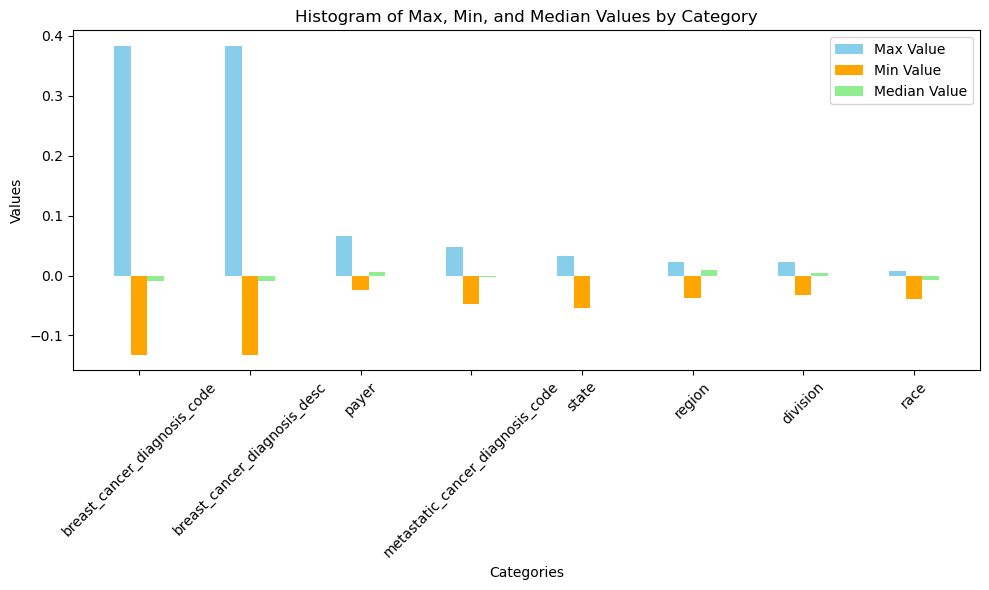

In [188]:
sorted_data = sorted(data, key=lambda x: x["max"], reverse=True)

categories = [item["category"] for item in sorted_data]
max_values = [item["max"] for item in sorted_data]
min_values = [item["min"] for item in sorted_data]
median_values = [item["median"] for item in sorted_data]

bar_width = 0.15
index = np.arange(len(categories))

plt.figure(figsize=(10, 6))

plt.bar(index, max_values, bar_width, label='Max Value', color='skyblue')
plt.bar(index + bar_width, min_values, bar_width, label='Min Value', color='orange')
plt.bar(index + 2*bar_width, median_values, bar_width, label='Median Value', color='lightgreen')

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Histogram of Max, Min, and Median Values by Category')
plt.xticks(index + bar_width, categories, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

Based on the above, the "breast_cancer_diagnosis_code" and "breast_cancer_diagnosis_desc" features would prove to be the most useful when predicting the target variable. The remaining categorical features could be explored further using methods such as feature engineering to determine if they could contribute to predicting the target. 

Columns to be dropped:
- "metastatic_first_novel_treatment"
- "metastatic_first_novel_treatment_type"
- "patient_gender"

### Computing correlation for numeric variables

## Exploring Null Values

In [189]:
print(f"% of features that contain atleast 1 null value is {round(100*len(summary_df[summary_df['% Null Values']>0])/len(summary_df.axes[0]),2)}")
print(f"% of features that contain 50% or more of null values is {round(100*len(summary_df[summary_df['% Null Values']>50])/len(summary_df.axes[0]),2)}")
print(f"% of features that contain 75% or more of null values is {round(100*len(summary_df[summary_df['% Null Values']>75])/len(summary_df.axes[0]),2)}")

% of features that contain atleast 1 null value is 47.37
% of features that contain 50% or more of null values is 2.63
% of features that contain 75% or more of null values is 1.32


Exploring columns with having more than 40% of it's values missing

In [190]:
summary_df[summary_df['% Null Values']>=50]

,Feature,% Null Values,Data Type
1,patient_race,50.535186,object
9,bmi,68.860548,float64
13,metastatic_first_novel_treatment,99.916496,object
14,metastatic_first_novel_treatment_type,99.916496,object


In [191]:
summary_df[summary_df['% Null Values']>=20]

,Feature,% Null Values,Data Type
1,patient_race,50.535186,object
9,bmi,68.860548,float64
13,metastatic_first_novel_treatment,99.916496,object
14,metastatic_first_novel_treatment_type,99.916496,object
